# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

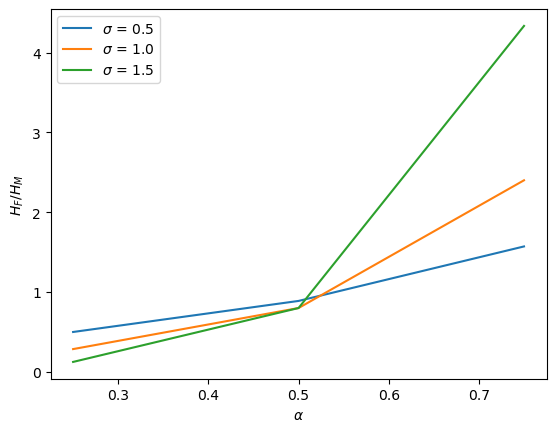

In [10]:
alpha_values = [ 0.25, 0.5, 0.75]
sigma_values = [ 0.5, 1.0, 1.5]
res = {}

#Discrete solving for every combination of alpha and sigma:
for sigma in sigma_values:
    model.par.sigma = sigma
    for alpha in alpha_values:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        #Saving results
        HFHM_ratio = opt.HF/opt.HM
        res[(alpha, sigma)] = HFHM_ratio
        
        #Printing results
        # print(f'For (\u03b1, \u03c3) = ({model.par.alpha:.2f}, {model.par.sigma:.2f}):    HF = {opt.HF:.2f}, HM = {opt.HM:.2f}, HF/HM: {HFHM_ratio:.2f}')

#Plotting HF/HM on alpha for every valye of sigma:
fig, ax = plt.subplots()
for sigma in sigma_values:
    y = [res[(alpha, sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, y, label=f"$\u03c3$ = {sigma}")
ax.set_xlabel("$\u03b1$")
ax.set_ylabel("$H_F/H_M$")
ax.legend()
plt.show()

# Question 2

We use an array of different values for female wage instead of the intitial value. For each on the entries in the array, we use the descrete solver provided to find the optimal amount of house work. The results are stored in two new arrays which in turn are used as coordinates in a plot.

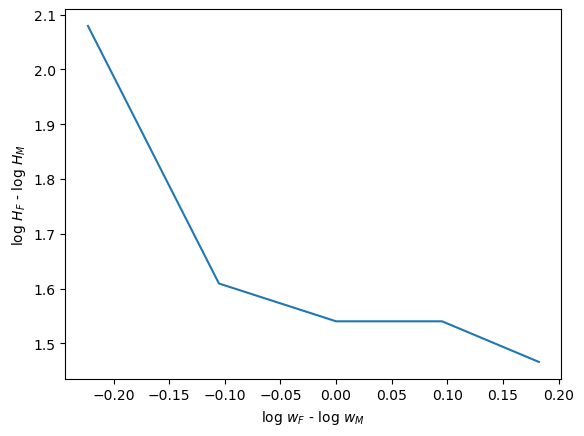

In [9]:
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
res_HFHM_d = np.empty(5)
res_wFwM_d = np.empty(5)

#Discrete solving:
for i, wF in enumerate(wF_values):
    model.par.wF = wF
    opt = model.solve_discrete()
    #Saving results
    res_HFHM_d[i] = np.log(opt.HF/opt.HM)
    res_wFwM_d[i] = np.log(model.par.wF/model.par.wM)
        
#Plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(res_wFwM_d, res_HFHM_d)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()

# Question 3

Same procedure as last year, James - except that we use model.solve instead of model.solve_discrete.

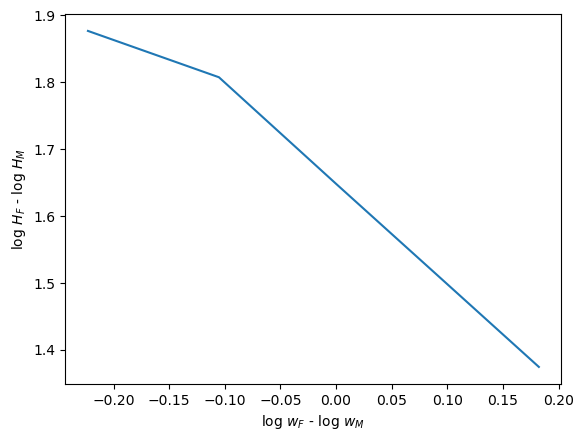

In [8]:
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
res_HFHM_c = np.empty(5)
res_wFwM_c = np.empty(5)

#Continuous solving:
for i, wF in enumerate(wF_values):
    model.par.wF = wF
    opt = model.solve()
    #Saving results
    res_HFHM_c[i] = np.log(opt.HF/opt.HM)
    res_wFwM_c[i] = np.log(model.par.wF/model.par.wM)
        
#Plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(res_wFwM_c, res_HFHM_c)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()

ADD CONCISE CONLUSION.

# Question 4

Explain your code and procedure

# Question 5

Explain your code and procedure